<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Acknowledgements" data-toc-modified-id="Acknowledgements-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Acknowledgements</a></span></li><li><span><a href="#Import-&amp;-Load-data" data-toc-modified-id="Import-&amp;-Load-data-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Import &amp; Load data</a></span></li><li><span><a href="#Missing-values?" data-toc-modified-id="Missing-values?-0.4"><span class="toc-item-num">0.4&nbsp;&nbsp;</span>Missing values?</a></span></li></ul></li><li><span><a href="#Cleaning-&amp;-Feature-Engineering" data-toc-modified-id="Cleaning-&amp;-Feature-Engineering-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Cleaning &amp; Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#belongs_to_collection" data-toc-modified-id="belongs_to_collection-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>belongs_to_collection</a></span></li><li><span><a href="#Genres" data-toc-modified-id="Genres-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Genres</a></span></li><li><span><a href="#homepage" data-toc-modified-id="homepage-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>homepage</a></span></li><li><span><a href="#original_language" data-toc-modified-id="original_language-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>original_language</a></span></li><li><span><a href="#Drop-unuseful-variables" data-toc-modified-id="Drop-unuseful-variables-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Drop unuseful variables</a></span></li><li><span><a href="#production_companies" data-toc-modified-id="production_companies-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>production_companies</a></span></li><li><span><a href="#production_countries" data-toc-modified-id="production_countries-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>production_countries</a></span></li><li><span><a href="#spoken_languages" data-toc-modified-id="spoken_languages-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>spoken_languages</a></span></li><li><span><a href="#Keywords" data-toc-modified-id="Keywords-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Keywords</a></span></li><li><span><a href="#cast" data-toc-modified-id="cast-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>cast</a></span></li><li><span><a href="#crew" data-toc-modified-id="crew-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>crew</a></span></li><li><span><a href="#release_date" data-toc-modified-id="release_date-1.12"><span class="toc-item-num">1.12&nbsp;&nbsp;</span>release_date</a></span></li><li><span><a href="#runtime" data-toc-modified-id="runtime-1.13"><span class="toc-item-num">1.13&nbsp;&nbsp;</span>runtime</a></span></li><li><span><a href="#budget" data-toc-modified-id="budget-1.14"><span class="toc-item-num">1.14&nbsp;&nbsp;</span>budget</a></span></li><li><span><a href="#popularity" data-toc-modified-id="popularity-1.15"><span class="toc-item-num">1.15&nbsp;&nbsp;</span>popularity</a></span></li><li><span><a href="#status" data-toc-modified-id="status-1.16"><span class="toc-item-num">1.16&nbsp;&nbsp;</span>status</a></span></li><li><span><a href="#target-variable---revenue" data-toc-modified-id="target-variable---revenue-1.17"><span class="toc-item-num">1.17&nbsp;&nbsp;</span>target variable - revenue</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# TMDB_Cleaning and Feature Engineering

### Introduction

In this project, I will use [TMDB Box Office dataset in Kaggle](https://www.kaggle.com/c/tmdb-box-office-prediction/data). 

The dataset contains 7,398 movies and a variety of metadata including cast, crew, keywords, budget, posters, release dates, languages, production companies, and countries. 

The main goal of this project is to build a machine learning model to predict the worldwide revenue for 4,398 movies in the test set. 


In this particular notebook, I will clean the dataset and extract useful data from existing metadata. 


### Acknowledgements

This dataset has been collected from TMDB. The movie details, credits and keywords have been collected from the TMDB Open API. This competition uses the TMDB API but is not endorsed or certified by TMDB. Their API also provides access to data on many additional movies, actors and actresses, crew members, and TV shows.

### Import & Load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import ast

import warnings 
warnings.filterwarnings('ignore')

from pathlib import Path
import os
os.getcwd()

'/Users/yejiseoung/Dropbox/My Mac (Yejis-MacBook-Pro.local)/Documents/Projects/TMDB'

In [2]:
import datetime

In [3]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [4]:
path = Path('/Users/yejiseoung/Dropbox/My Mac (Yejis-MacBook-Pro.local)/Documents/Projects/TMDB/datasets')

In [5]:
data = pd.read_csv(path/'train.csv')
print(data.shape)
data.head(2)

(3000, 23)


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435


In [6]:
data_test = pd.read_csv(path/'test.csv')
data_test.shape

(4398, 22)

### Missing values?

In [7]:
missing_vars = [var for var in data.columns if data[var].isnull().sum()>0]

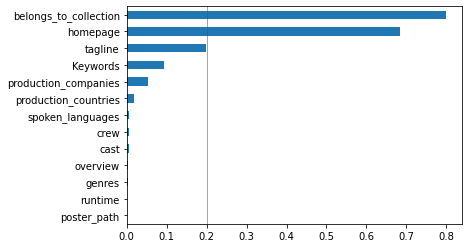

In [8]:
data[missing_vars].isnull().mean().sort_values(ascending=True).plot(kind='barh')
plt.axvline(x=0.2, linewidth=0.5, color='red');

`belongs_to_collection` and `homepage` have a lot of missing values in the variable. Other 11 variables have less than 20% of missing values.

What about test set?

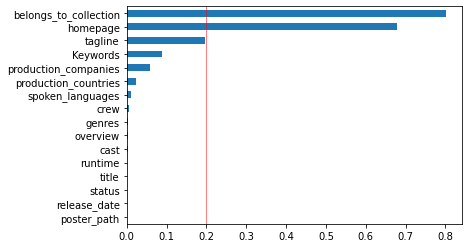

In [9]:
missing_vars_test = [var for var in data_test.columns if data_test[var].isnull().sum()>0]

data_test[missing_vars_test].isnull().mean().sort_values(ascending=True).plot(kind='barh')
plt.axvline(x=0.2, linewidth=0.5, color='red');

In [10]:
len(missing_vars), len(missing_vars_test)

(13, 16)

In [11]:
set(missing_vars_test).difference(set(missing_vars))

{'release_date', 'status', 'title'}

Test set has more variables which have missing values: release_date, status, title

## Cleaning & Feature Engineering

In this section, I explore the dataset and perform feature engineering if necessary. 

We have 8 variables which have dictionary values in column: 'belongs_to_collection', 'genres','production_companies','production_countries', 'spoken_languages', 'Keywords','cast', 'crew'.

So, I will figure out if we can extract meaningful information from those variables. 

### belongs_to_collection

In [12]:
def data_dict(data):
    """Function to analyze dictionary values in columns"""
    for col in dict_columns:
        data[col] = data[col].apply(lambda x: {} if pd.isnull(x) else ast.literal_eval(x))
    return data
    
dict_columns = ['belongs_to_collection', 'genres', 'production_companies',
               'production_countries', 'spoken_languages', 'Keywords',
               'cast', 'crew']

df_train = data_dict(data)
df_test = data_dict(data_test)

In [13]:
df_train['belongs_to_collection'].apply(lambda x: len(x) if x != np.nan else 0).value_counts()

0    2396
1     604
Name: belongs_to_collection, dtype: int64

In [14]:
# the percentage of missing values in each label
df_train['belongs_to_collection'].apply(lambda x: len(x) if x != np.nan else 0).value_counts() / len(df_train)

0    0.798667
1    0.201333
Name: belongs_to_collection, dtype: float64

`belongs_to_collection` has more than about 80% of missing values. 2396 are missing and 604 contain information including id, name, poster_path, backdrop_path. 

I think that only `name` information which shows whether the movie belongs to collection is useful. 

In [15]:
for i, e in enumerate(data['belongs_to_collection'][:5]):
    print(i, e)

0 [{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]
1 [{'id': 107674, 'name': 'The Princess Diaries Collection', 'poster_path': '/wt5AMbxPTS4Kfjx7Fgm149qPfZl.jpg', 'backdrop_path': '/zSEtYD77pKRJlUPx34BJgUG9v1c.jpg'}]
2 {}
3 {}
4 {}


Therefore, I will create `is_collection` feature which indicates whether the movie belongs to the collection or not, and drop the original `belongs_to_collection` feature

In [16]:
df_train['is_collection'] = df_train['belongs_to_collection'].apply(lambda x: len(x) if x != {} else 0)
df_test['is_collection'] = df_test['belongs_to_collection'].apply(lambda x: len(x) if x != {} else 0)

# drop belongs_to_collection
df_train.drop('belongs_to_collection', axis=1, inplace=True)
df_test.drop('belongs_to_collection', axis=1, inplace=True)

In [17]:
df_train.head(2)

,id,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,is_collection
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1
1,2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1


In [18]:
# check if is_collection has missing value
df_train['is_collection'].isnull().mean()

0.0

In [19]:
df_test['is_collection'].isnull().mean()

0.0

### Genres

`genres` has information on the types of genres belongs to the films, but a lot of them have multiple genres. 

In [20]:
for i, e in enumerate(df_train['genres'][:5]):
    print(i, e)

0 [{'id': 35, 'name': 'Comedy'}]
1 [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]
2 [{'id': 18, 'name': 'Drama'}]
3 [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'name': 'Drama'}]
4 [{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]


Let's figure out how many genres the movie has?

In [21]:
df_train['genres'].apply(lambda x: len(x) if x != {} else 0).value_counts()

2    972
3    900
1    593
4    393
5    111
6     21
0      7
7      3
Name: genres, dtype: int64

In [22]:
# the proportion of the number of genres distribution
df_train['genres'].apply(lambda x: len(x) if x != {} else 0).value_counts() / len(df_train)

2    0.324000
3    0.300000
1    0.197667
4    0.131000
5    0.037000
6    0.007000
0    0.002333
7    0.001000
Name: genres, dtype: float64

We can consider more then 5 genres are rare, because they have less than 5%. So, I would like to create a categorical variable with 5 labels: 1, 2, 3, 4, >4

Also, we found that there are 0 values in genres which means missing values. 

what about test?

In [23]:
df_test['genres'].apply(lambda x: len(x) if x != {} else 0).value_counts()

2    1407
3    1308
1     895
4     574
5     169
6      27
0      16
8       1
7       1
Name: genres, dtype: int64

In [24]:
df_test['genres'].apply(lambda x: len(x) if x != {} else 0).value_counts() / len(df_train)

2    0.469000
3    0.436000
1    0.298333
4    0.191333
5    0.056333
6    0.009000
0    0.005333
8    0.000333
7    0.000333
Name: genres, dtype: float64

Rare values are categories within a categorical variable that are present only in a small percentage of the observations. I consider any value below 5% can be a rare label. 

So, as we can see above, more than 5 genres can be rare labels.

I will perform the following steps: 

    1) Extract the number of genres, `num_genres` from `genres`
    2) Make `num_genres` a categorical variable. 
    3) Make 0 value to 'missing'
    4) Encode the values which have more than 5 genres as '>4'
    5) re-encode missing value as np.nan since I would like to explore which imputation method is best for later
    6) Drop the original `genres` column from both df_train and df_test dataset
   

In [25]:
# 1) Extract the num_genres from genres 
df_train['num_genres'] = df_train['genres'].apply(lambda x: len(x) if x != {} else 0)
df_test['num_genres'] = df_test['genres'].apply(lambda x: len(x) if x != {} else 0)

In [26]:
# 2) Make `num_genres` a categorical variable. 
df_train['num_genres'] = df_train['num_genres'].astype('O')
df_test['num_genres'] = df_test['num_genres'].astype('O')

In [27]:
# 3) Make 0 value to missing values
df_train['num_genres'] = df_train['num_genres'].replace(0, 'missing')
df_test['num_genres'] = df_test['num_genres'].replace(0, 'missing')

In [28]:
# 4) Encode the values which have more than 5 genres as '>4'
for i in range(len(df_train['num_genres'])):
    if df_train['num_genres'][i] in [1, 2, 3, 4, 'missing']:
        continue
    else: df_train['num_genres'][i] = '>4'
        
# apply the same conditions to df_test
for i in range(len(df_test['num_genres'])):
    if df_test['num_genres'][i] in [1, 2, 3, 4, 'missing']: continue
    else: df_test['num_genres'][i] = '>4'

Both `num_genres` in training and test set shows monotonic relationship. 

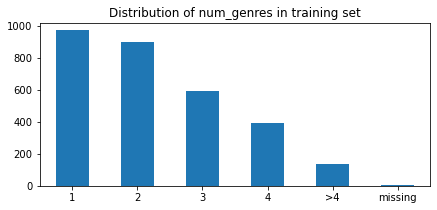

In [29]:
ax = df_train['num_genres'].value_counts().plot(kind='bar', figsize=(7, 3))
ax.set_xticklabels(['1', '2', '3', '4', '>4', 'missing'])
ax.xaxis.set_tick_params(rotation=0)
ax.set_title('Distribution of num_genres in training set');

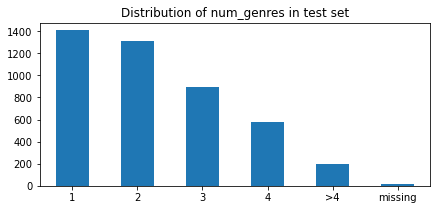

In [30]:
ax = df_test['num_genres'].value_counts().plot(kind='bar', figsize=(7, 3))
ax.set_xticklabels(['1', '2', '3', '4', '>4', 'missing'])
ax.xaxis.set_tick_params(rotation=0)
ax.set_title('Distribution of num_genres in test set');

In [31]:
# 5) re-encode missing value as np.nan 
# because I would like to explore which imputation method is best for later
df_train['num_genres'] = df_train['num_genres'].replace('missing', np.nan)
df_test['num_genres'] = df_test['num_genres'].replace('missing', np.nan)

In [32]:
# 6) drop the original column from df_train and df_test
df_train.drop('genres', axis=1, inplace=True)
df_test.drop('genres', axis=1, inplace=True)

### homepage

We found there are a lot of missing values in homepage variable both in training and test set. It might be better to create `is_homepage` column which indicates whether it has homepage or not. 


In [33]:
df_train['homepage'].isnull().mean()

0.6846666666666666

In [34]:
df_train['is_homepage'] = np.where(df_train['homepage'].isnull(), 0, 1)
df_test['is_homepage'] = np.where(df_test['homepage'].isnull(), 0, 1)

In [35]:
# drop original homepage column
df_train.drop('homepage', axis=1, inplace=True)
df_test.drop('homepage', axis=1, inplace=True)

### original_language

`Original_langauge` has high cardinality. highly cardinal variables tend to have many infrequent or rare categories

We found that the majority of movies' original language is English. So, I will create a variable which indicates whether the movie is in English or not.

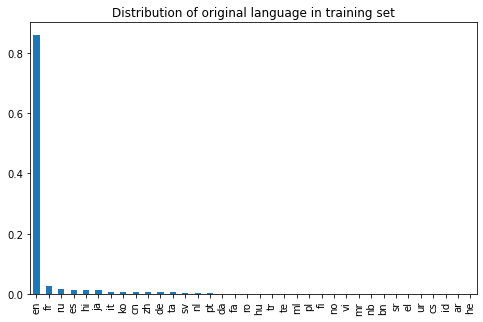

In [36]:
(df_train['original_language'].value_counts() /len(df_train)).plot(kind='bar', figsize=(8,5))
plt.title('Distribution of original language in training set');

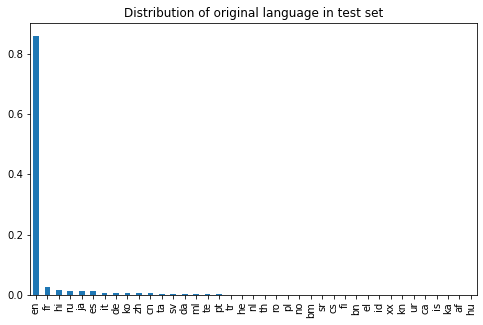

In [37]:
(df_test['original_language'].value_counts() / len(df_test)).plot(kind='bar', figsize=(8,5))
plt.title('Distribution of original language in test set');

In [38]:
# create is_English variable
df_train['is_English'] = np.where((df_train['original_language'] == 'en'), 1, 0)
df_test['is_English'] = np.where((df_test['original_language'] == 'en'), 1, 0)

In [39]:
# drop original language column
df_train.drop('original_language', axis=1, inplace=True)
df_test.drop('original_language', axis=1, inplace=True)

### Drop unuseful variables

I think `imdb_id`, `original_title`, `overview`, `poster_path`, `tagline`, `title` are useful to keep when building a machine learning model, so I will drop those variables

In [40]:
df_train.drop(['imdb_id', 'original_title', 'overview', 'poster_path', 'tagline', 'title'], axis=1, inplace=True)
df_test.drop(['imdb_id', 'original_title', 'overview', 'poster_path', 'tagline', 'title'], axis=1, inplace=True)

### production_companies

`production_companies` contains the name of production companies and its id. We found that a lot of movies have multiple prodution companies. 

In [41]:
for i, e in enumerate(df_train['production_companies'][:5]):
    print(i, e)

0 [{'name': 'Paramount Pictures', 'id': 4}, {'name': 'United Artists', 'id': 60}, {'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]
1 [{'name': 'Walt Disney Pictures', 'id': 2}]
2 [{'name': 'Bold Films', 'id': 2266}, {'name': 'Blumhouse Productions', 'id': 3172}, {'name': 'Right of Way Films', 'id': 32157}]
3 {}
4 {}


In [42]:
df_train['production_companies'].apply(lambda x: len(x) if x != {} else 0).value_counts() / len(df_train)

1     0.258333
2     0.244667
3     0.194000
4     0.104000
5     0.055333
0     0.052000
6     0.039333
7     0.020667
8     0.014000
9     0.009667
10    0.002333
11    0.002333
12    0.001000
16    0.000667
15    0.000667
14    0.000333
13    0.000333
17    0.000333
Name: production_companies, dtype: float64

__Insight__
- 0 value can be missing values. 
- More than 5 production companies can be encoded as '>5' because they have less than 5% values

Therefore, I will perform the following steps:

- 1) Extract the number of production companies and create a new variable called `num_pro_comps`
- 2) Convert `num_pro_comps` dtypes to categorical variable (object)
- 3) Change 0 value to 'missing' label
- 4) Encode the values which have more 5 production companies as '>5'
- 5) Re-encode 'missing' as np.nan
- 6) Drop the original column `production_companies`

In [43]:
# 1) Extract the number of production companies and create a new variable called num_pro_comps
df_train['num_pro_comps'] = df_train['production_companies'].apply(lambda x: len(x) if x != {} else 0)
df_test['num_pro_comps'] = df_test['production_companies'].apply(lambda x: len(x) if x != {} else 0)

In [44]:
# 2) Extract the number of production companies and create a new variable called num_pro_comps
df_train['num_pro_comps'] = df_train['num_pro_comps'].astype('O')
df_test['num_pro_comps'] = df_test['num_pro_comps'].astype('O')

In [45]:
# 3) Change 0 value to 'missing' label
df_train['num_pro_comps'] = df_train['num_pro_comps'].replace(0, 'missing')
df_test['num_pro_comps'] = df_test['num_pro_comps'].replace(0, 'missing')

In [46]:
# 4) Encode the values which have more 5 production companies as '>5'
for i in range(len(df_train)):
    if df_train['num_pro_comps'][i] in [1, 2, 3, 4, 5, 'missing']: continue
    else: df_train['num_pro_comps'][i] = '>5'
        
# apply the same conditions to df_test
for i in range(len(df_test)):
    if df_test['num_pro_comps'][i] in [1, 2, 3, 4, 5, 'missing']: continue
    else: df_test['num_pro_comps'][i] = '>5'

Both graphs below shows monotonic relationship

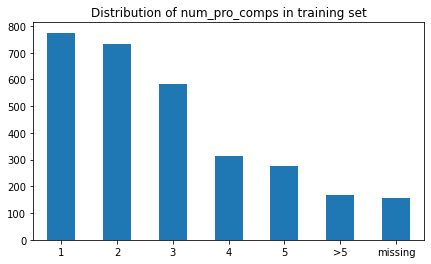

In [47]:
ax = df_train['num_pro_comps'].value_counts().plot(kind='bar', figsize=(7, 4))
ax.set_xticklabels(['1', '2', '3', '4', '5', '>5', 'missing'])
ax.set_title('Distribution of num_pro_comps in training set')
ax.xaxis.set_tick_params(rotation=0);

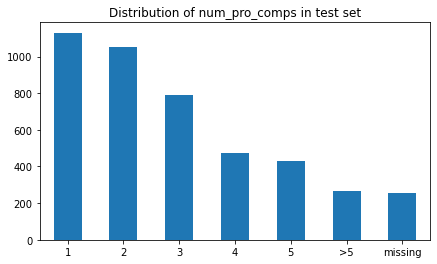

In [48]:
ax = df_test['num_pro_comps'].value_counts().plot(kind='bar', figsize=(7, 4))
ax.set_xticklabels(['1', '2', '3', '4', '5', '>5', 'missing'])
ax.set_title('Distribution of num_pro_comps in test set')
ax.xaxis.set_tick_params(rotation=0);

In [49]:
# 5) Re-encode 'missing' as np.nan
df_train['num_pro_comps'] = df_train['num_pro_comps'].replace('missing', np.nan)
df_test['num_pro_comps'] = df_test['num_pro_comps'].replace('missing', np.nan)

In [50]:
# check how many missing values in the df_train['num_pro_comps']
df_train['num_pro_comps'].isnull().mean()

0.052

In [51]:
df_test['num_pro_comps'].isnull().mean()

0.058663028649386086

In [52]:
# 6) Drop the original column production_companies
df_train.drop('production_companies', axis=1, inplace=True)
df_test.drop('production_companies', axis=1, inplace=True)

### production_countries

`production_countries` contains iso and the names of countries. 

In [53]:
for i, e in enumerate(df_train['production_countries'][:5]):
    print(i, e)

0 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
1 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
2 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
3 [{'iso_3166_1': 'IN', 'name': 'India'}]
4 [{'iso_3166_1': 'KR', 'name': 'South Korea'}]


In [54]:
df_train['production_countries'].apply(lambda x: len(x) if x != {} else 1).value_counts() / len(df_train)

1    0.759000
2    0.175000
3    0.038667
4    0.019000
5    0.007000
6    0.001000
8    0.000333
Name: production_countries, dtype: float64

The majority production countries is one or two countries. More than 3 countries can be considered as rare labels. 

Let's perform the following steps:

- 1) Extract the number of production countries and create new variable called `num_pro_count'
- 2) Convert the dtype as object
- 3) Encode the values which have more than 3 production countries as '>2'
- 4) Drop the original column `production_countries`



In [55]:
# 1) Extract the number of production countries and create new variable called `num_pro_count'
df_train['num_pro_count'] = df_train['production_countries'].apply(lambda x: len(x) if x != {} else 0)
df_test['num_pro_count'] = df_test['production_countries'].apply(lambda x: len(x) if x != {} else 0)

# 2) Convert the dtype as object
df_train['num_pro_count'] = df_train['num_pro_count'].astype('O')
df_test['num_pro_count'] = df_test['num_pro_count'].astype('O')

In [56]:
# 3) Encode the values which have more than 3 production countries as '>2'
for i in range(len(df_train)):
    if df_train['num_pro_count'][i] in [1, 2]: continue
    else: df_train['num_pro_count'][i] = '>2'
        
# apply the same conditions to df_test
for i in range(len(df_test)):
    if df_test['num_pro_count'][i] in [1, 2]: continue
    else: df_test['num_pro_count'][i] = '>2'

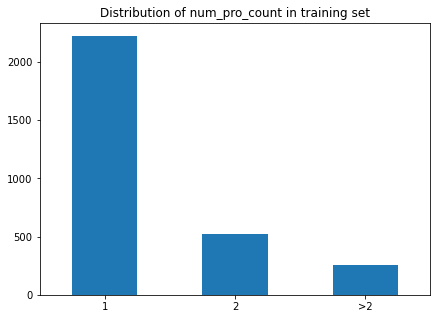

In [57]:
ax = df_train['num_pro_count'].value_counts().plot(kind='bar', figsize=(7, 5))
ax.set_title('Distribution of num_pro_count in training set')
ax.set_xticklabels(['1', '2', '>2'])
ax.xaxis.set_tick_params(rotation=0);

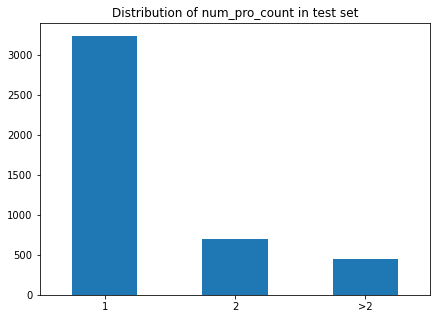

In [58]:
ax = df_test['num_pro_count'].value_counts().plot(kind='bar', figsize=(7, 5))
ax.set_title('Distribution of num_pro_count in test set')
ax.set_xticklabels(['1', '2', '>2'])
ax.xaxis.set_tick_params(rotation=0);

In [59]:
# 4) Drop the original column production_countries
df_train.drop('production_countries', axis=1, inplace=True)
df_test.drop('production_countries', axis=1, inplace=True)

### spoken_languages

I will extract the number of spoken languages from `spoken_lanuages`. Also, I will encode the values of more than 4 languages usage (>4).

In [60]:
df_train['spoken_languages'].apply(lambda x: len(x) if x != {} else 0).value_counts()/len(df_train)

1    0.701667
2    0.183000
3    0.072000
4    0.024000
5    0.007667
0    0.006667
6    0.002000
7    0.002000
8    0.000667
9    0.000333
Name: spoken_languages, dtype: float64

In [61]:
# 1) Extract the number of spoken languages and create new variable called `num_spoken_lang'
df_train['num_spoken_lang'] = df_train['spoken_languages'].apply(lambda x: len(x) if x != {} else 0)
df_test['num_spoken_lang'] = df_test['spoken_languages'].apply(lambda x: len(x) if x != {} else 0)

# 2) Convert the dtype as object
df_train['num_spoken_lang'] = df_train['num_spoken_lang'].astype('O')
df_test['num_spoken_lang'] = df_test['num_spoken_lang'].astype('O')

# 3) 0 value can be missing value
df_train['num_spoken_lang'] = df_train['num_spoken_lang'].replace(0, 'missing')
df_test['num_spoken_lang'] = df_test['num_spoken_lang'].replace(0, 'missing')

In [62]:
# 4) Encode the values which have more 4 languages usage as '>3'
for i in range(len(df_train)):
    if df_train['num_spoken_lang'][i] in [1, 2, 3, 'missing']: continue
    else: df_train['num_spoken_lang'][i] = '>3'
        
# apply to df_test
for i in range(len(df_test)):
    if df_test['num_spoken_lang'][i] in [1, 2, 3, 'missing']: continue
    else: df_test['num_spoken_lang'][i] = '>3'

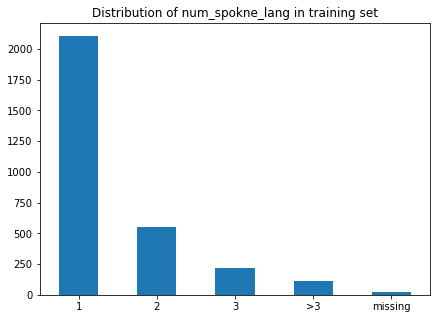

In [63]:
ax = df_train['num_spoken_lang'].value_counts().plot(kind='bar', figsize=(7, 5))
ax.set_title('Distribution of num_spokne_lang in training set')
ax.set_xticklabels(['1', '2', '3', '>3', 'missing'])
ax.xaxis.set_tick_params(rotation=0);

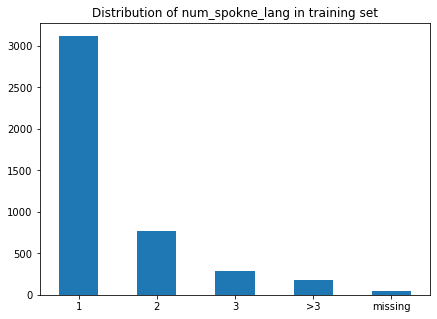

In [64]:
ax = df_test['num_spoken_lang'].value_counts().plot(kind='bar', figsize=(7, 5))
ax.set_title('Distribution of num_spokne_lang in training set')
ax.set_xticklabels(['1', '2', '3', '>3', 'missing'])
ax.xaxis.set_tick_params(rotation=0);

In [65]:
df_train['num_spoken_lang'] = df_train['num_spoken_lang'].replace('missing', np.nan)
df_test['num_spoken_lang'] = df_test['num_spoken_lang'].replace('missing', np.nan)

In [66]:
# check how many missing values in df_train['num_spoken_lang']
df_train['num_spoken_lang'].isnull().mean()

0.006666666666666667

In [67]:
df_test['num_spoken_lang'].isnull().mean()

0.009549795361527967

In [68]:
# 5) Drop the original column production_countries
df_train.drop('spoken_languages', axis=1, inplace=True)
df_test.drop('spoken_languages', axis=1, inplace=True)

### Keywords

`Keywords` contains id and the names of keywords for each movie. 

In [69]:
for i, e in enumerate(df_train['Keywords'][:5]):
    print(i, e)

0 [{'id': 4379, 'name': 'time travel'}, {'id': 9663, 'name': 'sequel'}, {'id': 11830, 'name': 'hot tub'}, {'id': 179431, 'name': 'duringcreditsstinger'}]
1 [{'id': 2505, 'name': 'coronation'}, {'id': 4263, 'name': 'duty'}, {'id': 6038, 'name': 'marriage'}, {'id': 13072, 'name': 'falling in love'}]
2 [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'name': 'obsession'}, {'id': 1640, 'name': 'conservatory'}, {'id': 2176, 'name': 'music teacher'}, {'id': 14512, 'name': 'new york city'}, {'id': 14819, 'name': 'violence'}, {'id': 33896, 'name': 'montage'}, {'id': 156823, 'name': 'drummer'}, {'id': 170418, 'name': 'public humiliation'}, {'id': 176095, 'name': 'jazz band'}, {'id': 206298, 'name': 'young adult'}, {'id': 207739, 'name': 'music school'}]
3 [{'id': 10092, 'name': 'mystery'}, {'id': 10540, 'name': 'bollywood'}, {'id': 11734, 'name': 'police corruption'}, {'id': 14536, 'name': 'crime'}, {'id': 14636, 'name': 'india'}, {'id': 208364, 'name': 'missing husband'}, {'id': 220935, 'name': 'ne

In [70]:
df_train['Keywords'].apply(lambda x: len(x) if x != {} else 0).value_counts()

5      293
0      276
4      248
3      228
6      227
2      207
7      192
1      187
8      161
9      134
11     132
10     125
12     100
13      85
15      59
14      59
16      58
17      45
18      29
20      24
21      23
19      22
22      17
23      15
24      12
27      12
25       6
26       5
28       2
30       2
32       2
29       2
31       2
37       2
39       1
97       1
43       1
40       1
33       1
38       1
149      1
Name: Keywords, dtype: int64

In [71]:
# 1) Extract the number of keywords and create new variable called `n_keywords'
df_train['n_keywords'] = df_train['Keywords'].apply(lambda x: len(x) if x != {} else 0)
df_test['n_keywords'] = df_test['Keywords'].apply(lambda x: len(x) if x != {} else 0)

# 2) Convert the dtype as object
#df_train['n_keywords'] = df_train['n_keywords'].astype('O')
#df_test['n_keywords'] = df_test['n_keywords'].astype('O')

# 3) 0 value can be missing value
df_train['n_keywords'] = df_train['n_keywords'].replace(0, -999)
df_test['n_keywords'] = df_test['n_keywords'].replace(0, -999)

# 4) Drop the original column production_countries
df_train.drop('Keywords', axis=1, inplace=True)
df_test.drop('Keywords', axis=1, inplace=True)

<AxesSubplot:>

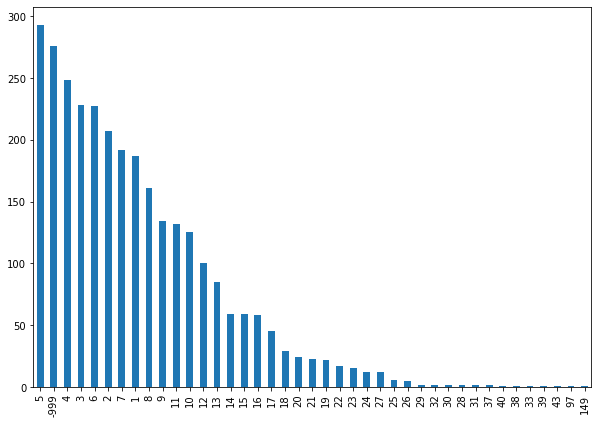

In [72]:
df_train['n_keywords'].value_counts().sort_values(ascending=False).plot(kind='bar', figsize=(10, 7))

We can create num_keywords' range

In [73]:
# set up bins
bins = [0, 5, 10, 15, 20, 150]

# set up labels
labels = ['<5', '<10', '<15', '<20', '>30']

# create num_keyword column
df_train['num_keywords'] = pd.cut(df_train['n_keywords'], bins=bins, labels=labels, include_lowest=False)
df_test['num_keywords'] = pd.cut(df_test['n_keywords'], bins=bins, labels=labels, include_lowest=False)

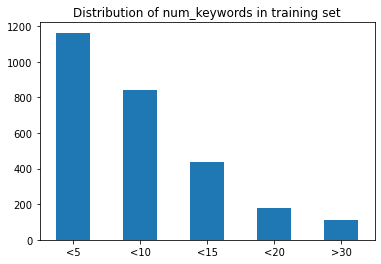

In [74]:
ax = df_train['num_keywords'].value_counts().sort_values(ascending=False).plot(kind='bar')
ax.set_title('Distribution of num_keywords in training set')
ax.xaxis.set_tick_params(rotation=0)

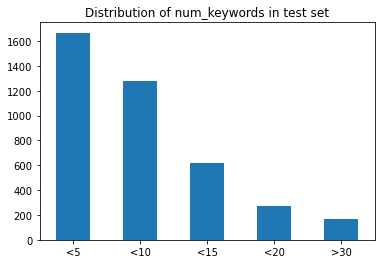

In [75]:
ax = df_test['num_keywords'].value_counts().sort_values(ascending=False).plot(kind='bar')
ax.set_title('Distribution of num_keywords in test set')
ax.xaxis.set_tick_params(rotation=0)

In [78]:
#1) Convert the dtype as object
df_train['num_keywords'] = df_train['num_keywords'].astype('O')
df_test['num_keywords'] = df_test['num_keywords'].astype('O')

#2) Drop the column n_keywords
df_train.drop('n_keywords', axis=1, inplace=True)
df_test.drop('n_keywords', axis=1, inplace=True)

In [79]:
df_train['num_keywords'].isnull().mean()

0.092

In [80]:
df_test['num_keywords'].isnull().mean()

0.08935879945429741

### cast

`cast` has names of actor or actress, genders, and character information. I would like to extract the number of casting people and the number of genders

In [82]:
for i, e in enumerate(df_train['cast'][0]):
    print(i, e)

0 {'cast_id': 4, 'character': 'Lou', 'credit_id': '52fe4ee7c3a36847f82afae7', 'gender': 2, 'id': 52997, 'name': 'Rob Corddry', 'order': 0, 'profile_path': '/k2zJL0V1nEZuFT08xUdOd3ucfXz.jpg'}
1 {'cast_id': 5, 'character': 'Nick', 'credit_id': '52fe4ee7c3a36847f82afaeb', 'gender': 2, 'id': 64342, 'name': 'Craig Robinson', 'order': 1, 'profile_path': '/tVaRMkJXOEVhYxtnnFuhqW0Rjzz.jpg'}
2 {'cast_id': 6, 'character': 'Jacob', 'credit_id': '52fe4ee7c3a36847f82afaef', 'gender': 2, 'id': 54729, 'name': 'Clark Duke', 'order': 2, 'profile_path': '/oNzK0umwm5Wn0wyEbOy6TVJCSBn.jpg'}
3 {'cast_id': 7, 'character': 'Adam Jr.', 'credit_id': '52fe4ee7c3a36847f82afaf3', 'gender': 2, 'id': 36801, 'name': 'Adam Scott', 'order': 3, 'profile_path': '/5gb65xz8bzd42yjMAl4zwo4cvKw.jpg'}
4 {'cast_id': 8, 'character': 'Hot Tub Repairman', 'credit_id': '52fe4ee7c3a36847f82afaf7', 'gender': 2, 'id': 54812, 'name': 'Chevy Chase', 'order': 4, 'profile_path': '/svjpyYtPwtjvRxX9IZnOmOkhDOt.jpg'}
5 {'cast_id': 9, 'char

In [83]:
# The number of casted people in movies
df_train['cast'].apply(lambda x: len(x) if x != {} else 0).value_counts()[:10]

15    212
16    165
10    135
13    129
12    124
11    122
17    118
9     118
18    115
14    110
Name: cast, dtype: int64

In [84]:
# the number of casted people
df_train['num_cast'] = df_train['cast'].apply(lambda x: len(x) if x != {} else 0)
df_test['num_cast'] = df_test['cast'].apply(lambda x: len(x) if x != {} else 0)

In [89]:
len(df_train[df_train['num_cast']==0])

26

There are 26 values which contain 0 values, and I think those are missing values

In [91]:
# encode 0 value as np.nan
df_train['num_cast'] = df_train['num_cast'].replace(0, np.nan)
df_test['num_cast'] = df_test['num_cast'].replace(0, np.nan)

In [92]:
df_train['num_cast'].isnull().mean()

0.008666666666666666

In [93]:
df_test['num_cast'].isnull().mean()

0.007730786721236926

- `gender` information 
- 0: unspecified
- 1: female
- 2: male

In [80]:
# the number of each gender 
#df_train['num_g_unspecified'] = df_train['cast'].apply(lambda x: sum([1 for i in x if i['gender']==0]))
#df_train['num_g_female'] = df_train['cast'].apply(lambda x: sum([1 for i in x if i['gender']==1]))
#df_train['num_g_male'] = df_train['cast'].apply(lambda x: sum([1 for i in x if i['gender']==2]))

#df_test['num_g_unspecified'] = df_test['cast'].apply(lambda x: sum([1 for i in x if i['gender']==0]))
#df_test['num_g_female'] = df_test['cast'].apply(lambda x: sum([1 for i in x if i['gender']==1]))
#df_test['num_g_male'] = df_test['cast'].apply(lambda x: sum([1 for i in x if i['gender']==2]))

In [81]:
print('There are {} data which we do not know gender information'.format(len(df_train[df_train['num_g_unspecified']!=0])))
print(df_train.shape)

There are 2635 data which we do not know gender information
(3000, 21)


2635 data out of 3000 do not provide gender information correctly, so I will remove all gender information from dataset. 

In [86]:
# drop all gender information and original cast column
#df_train.drop(['num_g_unspecified', 'num_g_female', 'num_g_male', 'cast'], axis=1, inplace=True)
#df_test.drop(['num_g_unspecified', 'num_g_female', 'num_g_male', 'cast'], axis=1, inplace=True)

df_train.drop(['cast'], axis=1, inplace=True)
df_test.drop(['cast'], axis=1, inplace=True)

### crew

`crew` contains name, department, gender, job title. I would like to extract the number of crew members for the movies and the number of genders. 

In [94]:
for i, e in enumerate(df_train['crew'][0]):
    print(i, e)

0 {'credit_id': '59ac067c92514107af02c8c8', 'department': 'Directing', 'gender': 0, 'id': 1449071, 'job': 'First Assistant Director', 'name': 'Kelly Cantley', 'profile_path': None}
1 {'credit_id': '52fe4ee7c3a36847f82afad7', 'department': 'Directing', 'gender': 2, 'id': 3227, 'job': 'Director', 'name': 'Steve Pink', 'profile_path': '/myHOgo8mQSCiCAZNGMRdHVr03jr.jpg'}
2 {'credit_id': '5524ed25c3a3687ded000d88', 'department': 'Writing', 'gender': 2, 'id': 347335, 'job': 'Writer', 'name': 'Josh Heald', 'profile_path': '/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg'}
3 {'credit_id': '5524ed2d925141720c001128', 'department': 'Writing', 'gender': 2, 'id': 347335, 'job': 'Characters', 'name': 'Josh Heald', 'profile_path': '/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg'}
4 {'credit_id': '5524ed3d92514166c1004a5d', 'department': 'Production', 'gender': 2, 'id': 57822, 'job': 'Producer', 'name': 'Andrew Panay', 'profile_path': None}
5 {'credit_id': '5524ed4bc3a3687df3000dd2', 'department': 'Production', 'gender': 0, 'id'

In [95]:
df_train['crew'].apply(lambda x: len(x) if x!={} else 0).value_counts()

2      179
11     127
3      126
10     126
12     110
      ... 
154      1
156      1
172      1
194      1
183      1
Name: crew, Length: 153, dtype: int64

There are 16 of 0 value in `num_crew` and this should be missing value. 

In [96]:
# 1) extract the number of crew people
df_train['n_crew'] = df_train['crew'].apply(lambda x: len(x) if x != {} else 0)
df_test['n_crew'] = df_test['crew'].apply(lambda x: len(x) if x != {} else 0)


# 2) create num_crew range category which indicate small-size crew, medium size crew, large size crew
bins = [0, 20, 80, 200]
labels = ['small', 'medium', 'large']
df_train['num_crew'] = pd.cut(df_train['n_crew'], bins=bins, labels=labels, include_lowest=False)
df_test['num_crew'] = pd.cut(df_test['n_crew'], bins=bins, labels=labels, include_lowest=False)


# 3) convert dtype to Object
df_train['num_crew'] = df_train['num_crew'].astype('O')
df_test['num_crew'] = df_test['num_crew'].astype('O')


# 4) encode np.nan (originally 0 value) as 'missing'
df_train['num_crew'].fillna('missing', inplace=True)
df_test['num_crew'].fillna('missing', inplace=True)

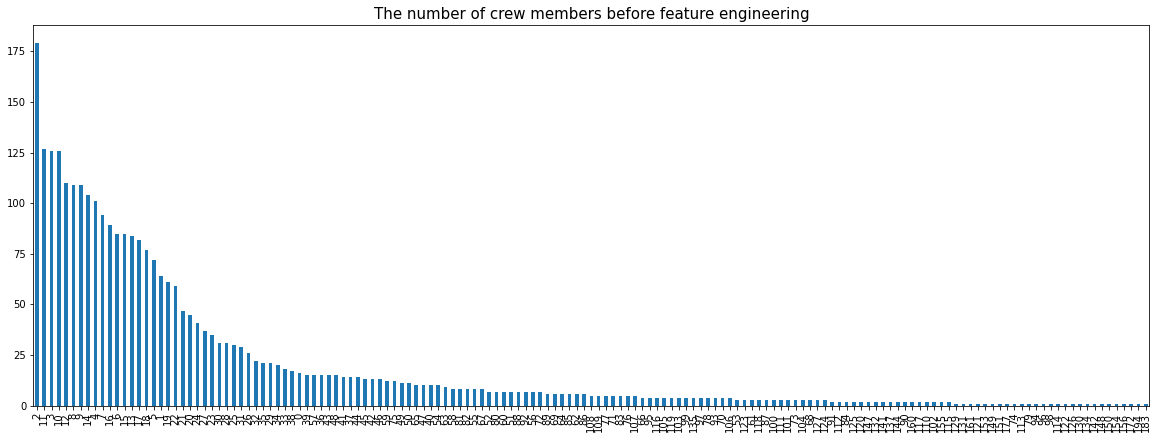

In [97]:
df_train['n_crew'].value_counts().plot(kind='bar', figsize=(20, 7))
plt.title('The number of crew members before feature engineering', fontsize=15);

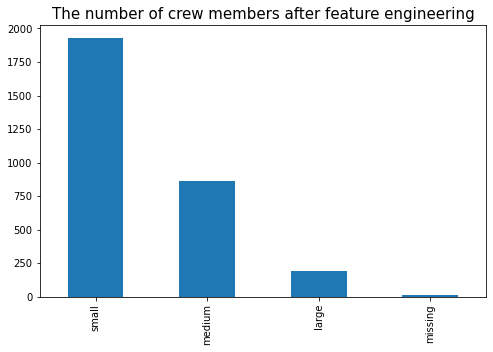

In [98]:
df_train['num_crew'].value_counts().plot(kind='bar', figsize=(8, 5))
plt.title('The number of crew members after feature engineering', fontsize=15);

In [99]:
# extract gender information from crew
df_train['num_g_unspecified_crew'] = df_train['crew'].apply(lambda x: sum([1 for i in x if i['gender']==0]))
df_train['num_g_female_crew'] = df_train['crew'].apply(lambda x: sum([1 for i in x if i['gender']==1]))
df_train['num_g_male_crew'] = df_train['crew'].apply(lambda x: sum([1 for i in x if i['gender']==2]))

df_test['num_g_unspecified_crew'] = df_test['crew'].apply(lambda x: sum([1 for i in x if i['gender']==0]))
df_test['num_g_female_crew'] = df_test['crew'].apply(lambda x: sum([1 for i in x if i['gender']==1]))
df_test['num_g_male_crew'] = df_test['crew'].apply(lambda x: sum([1 for i in x if i['gender']==2]))

In [100]:
len(df_train[df_train['num_g_unspecified_crew']!=0])

2671

In [101]:
df_train.shape

(3000, 22)

I found that there are a lot of unspecified gender information for crew members, 2,671 out of 3000, so I think the gender information of crew members are not useful. I will remove all from the dataset. 

In [102]:
# drop gender information for crew members and original crew column
df_train.drop(['crew', 'num_g_unspecified_crew', 'num_g_female_crew', 'num_g_male_crew', 'n_crew'], 
              axis=1, inplace=True)
df_test.drop(['crew', 'num_g_unspecified_crew', 'num_g_female_crew', 'num_g_male_crew', 'n_crew'], 
              axis=1, inplace=True)

### release_date

`release_date` has month-date-year format. I would like to extract `year`, `month`, and `date`, `dayofweek` information from it. 

In [103]:
df_train['release_date'].min(), df_train['release_date'].max()

('1/1/03', '9/9/93')

As we can see above, `release_date` has month, date, and two-digits of year. 

In [104]:
# check if there is missing value
df_train['release_date'].isnull().mean()

0.0

In [105]:
df_test['release_date'].isnull().mean()

0.00022737608003638017

In [106]:
df_train[['release_month', 'release_day', 'release_year']] = df_train['release_date'].str.split('/', expand=True).astype(int)

In [107]:
df_train['release_year'].unique()

array([15,  4, 14, 12,  9, 87, 96,  3, 76, 99,  5,  2, 10, 13, 11, 98, 82,
        6, 92, 97, 86,  7,  0, 95, 65, 67, 17, 94,  8, 80, 88, 16, 93, 56,
       89, 62, 90, 81, 84, 79,  1, 66, 78, 68, 83, 75, 85, 91, 28, 69, 33,
       49, 70, 71, 77, 40, 54, 57, 53, 32, 60, 48, 58, 61, 59, 52, 44, 55,
       51, 73, 72, 36, 31, 35, 42, 27, 64, 39, 25, 50, 45, 43, 74, 21, 63,
       38, 47, 30, 26, 24])

In [108]:
df_train['release_month'].unique()

array([ 2,  8, 10,  3,  1,  4, 11,  7,  9,  6, 12,  5])

In [109]:
df_train['release_day'].unique()

array([20,  6, 10,  9,  5, 30, 15, 16, 21,  4, 25,  2,  3, 13, 28, 23,  8,
        7, 26, 22, 24, 17,  1, 19, 14, 31, 18, 29, 11, 12, 27])

This competition published in 2019, so I assume that if two digits are between 0 and 19, they should be released after 2000, otherwise 1900. 

In [110]:
# Convert two digits of year to 4 digits
df_train.loc[(df_train['release_year'] <= 19) & (df_train['release_year'] >=0), 'release_year'] += 2000
df_train.loc[(df_train['release_year'] > 19) & (df_train['release_year']<100), 'release_year'] += 1900

In [111]:
df_train['release_year'].min(), df_train['release_year'].max()

(1921, 2017)

In [112]:
# There is one missing value in test set
len(df_test[df_test['release_date'].isnull()])

1

In [113]:
# apply to test set
# since we have a missing value in test set, 
# we need to replace it with arbitrary value (-999)
# in order to avoid the error
df_test[['release_month', 'release_day', 'release_year']] = df_test['release_date'].str.split('/', expand=True).replace(np.nan, -999).astype(int)

In [114]:
df_test['release_year'].unique()

array([   7,   58,   97,   10,    5,   96,    0,   99,   14,   80,    2,
          8,   79,   98,    6,    4,   16,   91,   88,   12,    1,    3,
         86,   11,   87,   90,   44,   77,   95,   93,   84,   15,   17,
         92,   74,   85,    9,   28,   89,   67,   13,   66,   27,   59,
         57,   94,   34,   81,   69,   76,   75,   30,   64,   56,   54,
         60,   65,   83,   52,   63,   55,   82,   78,   51,   38,   73,
         61,   53,   72,   40,   62,   68,   48,   41,   25, -999,   71,
         37,   70,   31,   33,   36,   39,   45,   29,   46,   50,   35,
         49,   18,   23,   42,   22,   26])

In [115]:
df_test.loc[(df_test['release_year'] <= 19) & (df_test['release_year'] >=0), 'release_year'] += 2000
df_test.loc[(df_test['release_year'] > 19) & (df_test['release_year']<100), 'release_year'] += 1900

In [116]:
df_test['release_year'].unique()

array([2007, 1958, 1997, 2010, 2005, 1996, 2000, 1999, 2014, 1980, 2002,
       2008, 1979, 1998, 2006, 2004, 2016, 1991, 1988, 2012, 2001, 2003,
       1986, 2011, 1987, 1990, 1944, 1977, 1995, 1993, 1984, 2015, 2017,
       1992, 1974, 1985, 2009, 1928, 1989, 1967, 2013, 1966, 1927, 1959,
       1957, 1994, 1934, 1981, 1969, 1976, 1975, 1930, 1964, 1956, 1954,
       1960, 1965, 1983, 1952, 1963, 1955, 1982, 1978, 1951, 1938, 1973,
       1961, 1953, 1972, 1940, 1962, 1968, 1948, 1941, 1925, -999, 1971,
       1937, 1970, 1931, 1933, 1936, 1939, 1945, 1929, 1946, 1950, 1935,
       1949, 2018, 1923, 1942, 1922, 1926])

In [117]:
# re-encode the missing value as np.nan
df_test[['release_month', 'release_day', 'release_year']] = df_test[['release_month', 'release_day', 'release_year']].replace(-999, np.nan)

In [118]:
df_test['release_year'].min(), df_test['release_year'].max()

(1922.0, 2018.0)

Month in both training and test set look good

In [119]:
df_train['release_month'].unique()

array([ 2,  8, 10,  3,  1,  4, 11,  7,  9,  6, 12,  5])

In [120]:
df_test['release_month'].unique()

array([ 7.,  5.,  9.,  2., 12.,  3., 10.,  6.,  4., 11.,  8.,  1., nan])

Let's extract dayofweek

In [121]:
df_train['release_date'] = df_train['release_date'].astype('datetime64')
df_train['release_dayofweek'] = df_train['release_date'].dt.dayofweek

df_test['release_date'] = df_test['release_date'].astype('datetime64')
df_test['release_dayofweek'] = df_test['release_date'].dt.dayofweek

In [122]:
df_train.head(2)

,id,budget,popularity,release_date,runtime,status,revenue,is_collection,num_genres,is_homepage,is_English,num_pro_comps,num_pro_count,num_spoken_lang,num_keywords,num_cast,num_crew,release_month,release_day,release_year,release_dayofweek
0,1,14000000,6.575393,2015-02-20,93.0,Released,12314651,1,1,0,1,3,1,1,<5,24.0,medium,2,20,2015,4
1,2,40000000,8.248895,2004-08-06,113.0,Released,95149435,1,4,0,1,1,1,1,<5,20.0,small,8,6,2004,4


In [123]:
df_test.head(2)

,id,budget,popularity,release_date,runtime,status,is_collection,num_genres,is_homepage,is_English,num_pro_comps,num_pro_count,num_spoken_lang,num_keywords,num_cast,num_crew,release_month,release_day,release_year,release_dayofweek
0,3001,0,3.851534,2007-07-14,90.0,Released,1,4,1,0,NaN,2,2,<5,7.0,small,7.0,14.0,2007.0,5.0
1,3002,88000,3.559789,2058-05-19,65.0,Released,0,2,0,1,1,1,1,<10,10.0,small,5.0,19.0,1958.0,6.0


In [124]:
# 3) drop release_date
df_train.drop('release_date', axis=1, inplace=True)
df_test.drop('release_date', axis=1, inplace=True)

### runtime

In [125]:
# check if there is misisng values
[var for var in df_train.columns if df_train[var].isnull().mean()>0]

['runtime',
 'num_genres',
 'num_pro_comps',
 'num_spoken_lang',
 'num_keywords',
 'num_cast']

In [126]:
[var for var in df_test.columns if df_test[var].isnull().mean()>0]

['runtime',
 'status',
 'num_genres',
 'num_pro_comps',
 'num_spoken_lang',
 'num_keywords',
 'num_cast',
 'release_month',
 'release_day',
 'release_year',
 'release_dayofweek']

Both training and test data have missing values in `runtime`

In [127]:
df_train['runtime'].isnull().mean()

0.0006666666666666666

In [128]:
df_test['runtime'].isnull().mean()

0.0009095043201455207

Also, there are 12 data that have 0 value in runtime. This does not make sense, and they can be missing values. 

In [129]:
len(df_train[df_train['runtime']==0])

12

In [130]:
len(df_test[df_test['runtime']==0])

9

I will encode 0 values in runtime as NaN

In [131]:
df_train['runtime'] = df_train['runtime'].replace(0, np.nan)
df_test['runtime'] = df_test['runtime'].replace(0, np.nan)

In [132]:
# check the proportion of misisng value
print(df_train['runtime'].isnull().mean())
print(df_test['runtime'].isnull().mean())

0.004666666666666667
0.0029558890404729424


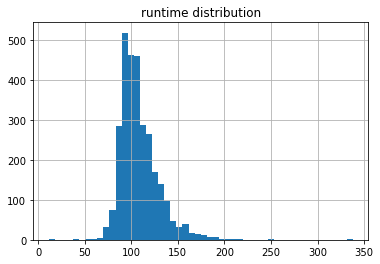

In [133]:
# runtime distribution 
df_train['runtime'].hist(bins=50)
plt.title('runtime distribution', fontsize=12);

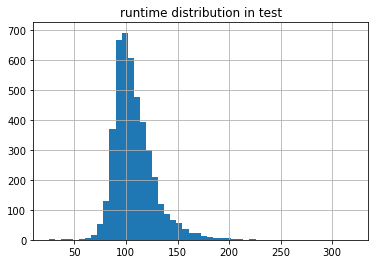

In [134]:
df_test['runtime'].hist(bins=50)
plt.title('runtime distribution in test', fontsize=12);

Both training and test's runtime show normal distribution with outliers. 

### budget

`budget` in training and test set do not have missing values. However, I found there are some 0 values 

In [135]:
print(df_train['budget'].isnull().mean())
print(df_test['budget'].isnull().mean())

0.0
0.0


In [136]:
len(df_train[df_train['budget']==0])

812

In [137]:
len(df_test[df_test['budget']==0])

1211

That doesn't make sense, so I consider 0 budget as missing values

In [138]:
# encode 0 value as NaN
df_train['budget'] = df_train['budget'].replace(0, np.nan)
df_test['budget'] = df_test['budget'].replace(0, np.nan)

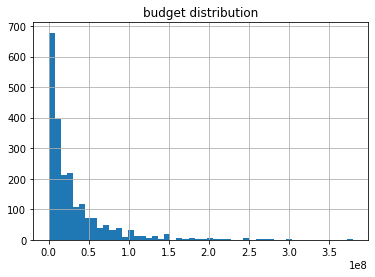

In [139]:
# budget distribution 
df_train['budget'].hist(bins=50)
plt.title('budget distribution', fontsize=12);

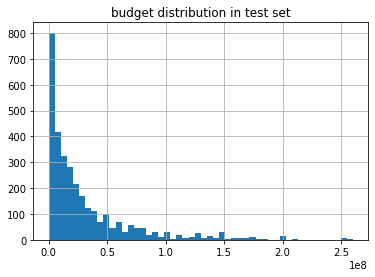

In [140]:
# budget distribution 
df_test['budget'].hist(bins=50)
plt.title('budget distribution in test set', fontsize=12);

Both budget in training and test set show right skewed distribution. 

### popularity

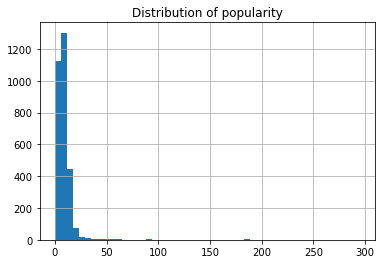

In [141]:
# distribution of popularity in training set
df_train['popularity'].hist(bins=50)
plt.title('Distribution of popularity', fontsize=12);

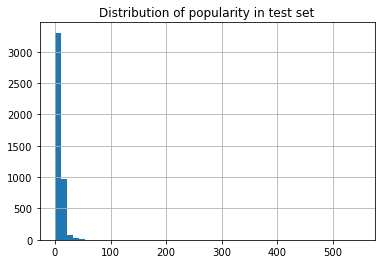

In [142]:
df_test['popularity'].hist(bins=50)
plt.title('Distribution of popularity in test set', fontsize=12);

Both popularity in training and test have right skewed distribution. The range of popularity in test set is larger than training set. 

In [143]:
df_train['popularity'].describe()

count    3000.000000
mean        8.463274
std        12.104000
min         0.000001
25%         4.018053
50%         7.374861
75%        10.890983
max       294.337037
Name: popularity, dtype: float64

In [144]:
df_test['popularity'].describe()

count    4398.000000
mean        8.550230
std        12.209014
min         0.000001
25%         3.895186
50%         7.482242
75%        10.938524
max       547.488298
Name: popularity, dtype: float64

### status

As we can see below, training set has 2 different values, Released and Rumored, but it has negligible amount of Rumored (only 0.1%). In test set, there 3 different values, Released, Rumored, and Post Production. This can be a problem when building machine learning models because the model only learns from training set, not testing set, so it won't be able to know how to handle with unseen value (Post Production). 

Furthermore, the values of Released are the majority values in both training and test dataset, so I would like to remove this variable. 

In [145]:
df_train['status'].value_counts()

Released    2996
Rumored        4
Name: status, dtype: int64

In [146]:
df_train['status'].value_counts() / len(df_train)

Released    0.998667
Rumored     0.001333
Name: status, dtype: float64

In [147]:
df_test['status'].value_counts()

Released           4389
Post Production       5
Rumored               2
Name: status, dtype: int64

In [148]:
df_test['status'].value_counts() / len(df_test)

Released           0.997954
Post Production    0.001137
Rumored            0.000455
Name: status, dtype: float64

In [149]:
# drop status variable
df_train.drop('status', axis=1, inplace=True)
df_test.drop('status', axis=1, inplace=True)

### target variable - revenue

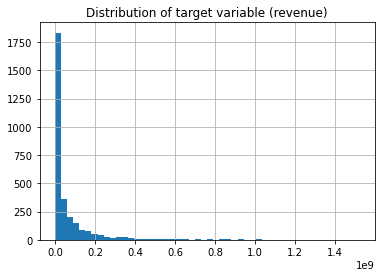

In [150]:
df_train['revenue'].hist(bins=50)
plt.title('Distribution of target variable (revenue)', fontsize=12);

We found the target variable has right-skewed distribution. 

It looks better with log transformation

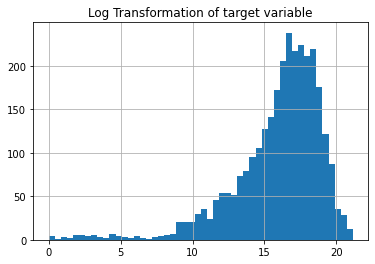

In [151]:
np.log(df_train['revenue']).hist(bins=50)
plt.title('Log Transformation of target variable', fontsize=12);

In [152]:
df_train['revenue'].describe().apply(lambda x: format(x, 'f'))

count          3000.000000
mean       66725851.888667
std       137532326.336018
min               1.000000
25%         2379808.250000
50%        16807068.000000
75%        68919203.500000
max      1519557910.000000
Name: revenue, dtype: object

## Conclusion

In [153]:
# Save cleaned data for building models
df_train.to_csv(path/'cleaned_train.csv', index=False)
df_test.to_csv(path/'cleaned_test.csv', index=False)

I had a look at the dataset and made some new variables by extracting useful information from original features. Next, I will perform feature engineering and feature selection before building a model. 